# 🧪 YOLOv8 Experiment 1: MOCS Dataset (YOLOv8m)

## 📁 Dataset
- **Dataset**: MOCS (construction site scenes)
- **Split used**: Training and validation
- **Model**: YOLOv8m (medium variant)

## ⚙️ Training Summary
- **Epochs**: 100
- **Speed**: 0.1ms preprocess, 0.7ms inference, 1.1ms postprocess/image
- **Model Size**: 72 layers, ~11.1M parameters, 28.5 GFLOPs

## 📊 Detection Metrics (on validation set)

| Class           | Images | Instances | Precision | Recall | mAP50 | mAP50-95 |
|----------------|--------|-----------|-----------|--------|-------|----------|
| **all**         | 17     | 86        | 0.929     | 0.882  | 0.953 | 0.833    |
| Worker          | 16     | 59        | 0.978     | 0.759  | 0.914 | 0.708    |
| Tower crane     | 2      | 2         | 0.867     | 1.000  | 0.995 | 0.995    |
| Vehicle crane   | 3      | 3         | 0.823     | 1.000  | 0.995 | 0.899    |
| Roller          | 1      | 1         | 0.864     | 1.000  | 0.995 | 0.995    |
| Excavator       | 8      | 9         | 0.979     | 0.889  | 0.895 | 0.872    |
| Truck           | 4      | 7         | 1.000     | 0.819  | 0.920 | 0.766    |
| Loader          | 2      | 2         | 0.918     | 1.000  | 0.995 | 0.925    |
| Other vehicle   | 2      | 3         | 1.000     | 0.586  | 0.913 | 0.502    |

## 📈 Training Curves Highlights

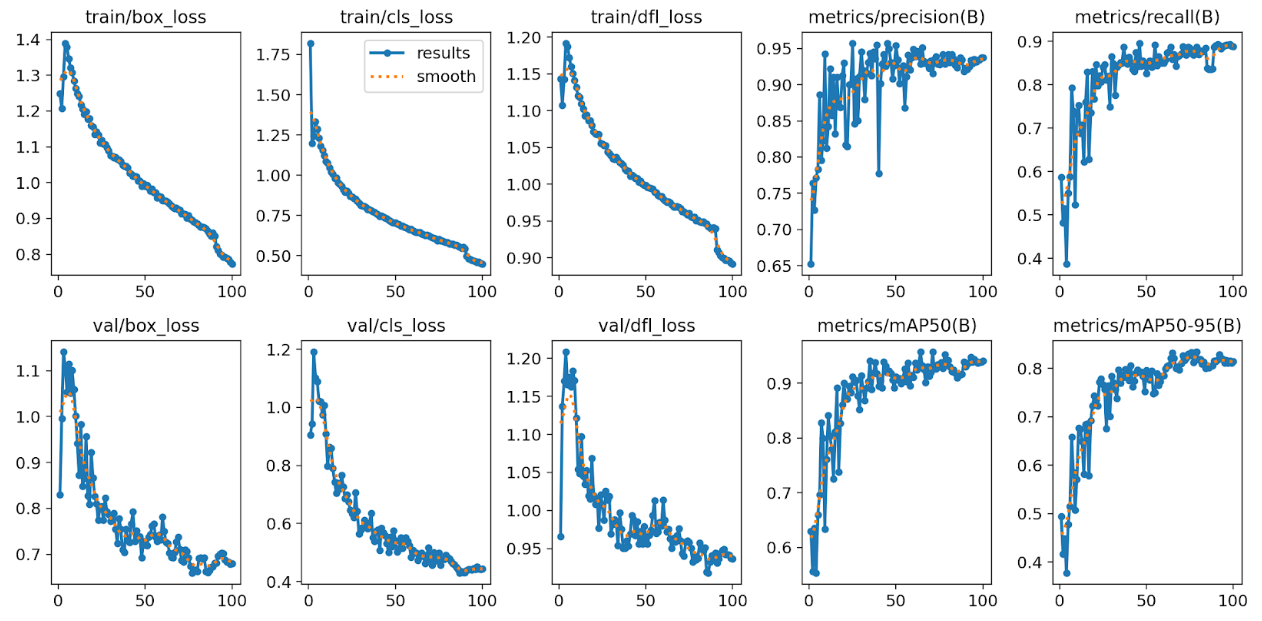


## ✅ Key Takeaways

- High mAP scores on most vehicle classes, especially cranes and rollers.
- Lower recall on "Worker" and "Other vehicle" likely due to data imbalance and occlusions.
- Promising base model already.

🗂️ Results directory:  
`/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolov8s_FT_mocs2`


# 💻 Implementation

### Setup

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 100.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from ultralytics import YOLO
import os
import json
import sys
sys.path.append("/content/gdrive/MyDrive/DISAL/hazard-detection-project/utils/data_format_conversions")

from create_mocs_submission import create_mocs_submission, zip_submission

### Finetuning yolov8s on MOCS

##### Training

In [ ]:
!yolo detect train \
  model=yolov8s.pt \
  data=/content/gdrive/MyDrive/DISAL/Disal-Data/Benchmarks/MOCS/data.yaml \
  epochs=100 \
  imgsz=640 \
  batch=16 \
  project=/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect \
  name=yolov8s_FT_mocs

Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/gdrive/MyDrive/DISAL/Disal-Data/Benchmarks/MOCS/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8s_FT_mocs2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, p

##### Testing & generating MOCS submission file

In [ ]:
# Load fine-tuned model
model = YOLO("/content/gdrive/MyDrive/DISAL/Disal-Data/runs/detect/yolov8s_FT_mocs2/weights/best.pt")


In [ ]:
# Run inference on the test images folder (without saving visuals or txts)
results = model.predict(
    source="/content/gdrive/MyDrive/DISAL/Disal-Data/Benchmarks/MOCS/images/test",
    save=False,
    save_txt=False,
    save_conf=False,
    stream=False,
    verbose=False,
)

WARNING ⚠️ 
inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs



AttributeError: 'NoneType' object has no attribute 'ndim'

In [ ]:
create_mocs_submission(
    results,
    output_dir="/content/gdrive/MyDrive/DISAL/Disal-Data/runs/predict/yolov8s_FT_mocs2/submission",
    filename="answer.json"
)

zip_submission("/content/gdrive/MyDrive/DISAL/Disal-Data/runs/predict/yolov8s_FT_mocs2/submission/answer.json")
